In [22]:
import numpy as np
import pandas as pd
import yfinance as yf
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model


In [7]:
#load model
model = load_model('C:/Users/adegb/Desktop/Computer Vision Projects/Bitcon-price-prediction/model/BitcoinPricePrediction.keras')
data = pd.DataFrame(yf.download('BTC-USD', '2014-06-20', '2024-06-20'))
data = data.reset_index()


[*********************100%%**********************]  1 of 1 completed


In [8]:

# Drop unnecessary columns: 'Date', 'Open', 'High', 'Low', 'Adj Close', and 'Volume'
data.drop(columns=['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)

# Split the data into training and testing data
train_data = data[:-200]
test_data = data[-200:]

# Scale training data into the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
test_data_scale = scaler.fit_transform(test_data)

In [9]:
# Number of previous days to use for prediction
base_days = 100

# Create input sequences (x) and corresponding target values (y)
x = []
y = []

for i in range(base_days, test_data_scale.shape[0]):
    x.append(test_data_scale[i - base_days:i])
    y.append(test_data_scale[i, 0])
    
# Convert arrays to numpy arrays
x, y = np.array(x), np.array(y)
# Reshape input data to match LSTM input shape
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [10]:
pred = model.predict(x)
pred = scaler.inverse_transform(pred)
pred = pred.reshape(-1,1)
Orig = scaler.inverse_transform(y.reshape(-1,1))
pred = pd.DataFrame(pred, columns=['Predicted Bitcoin Price'])
Orig = pd.DataFrame(Orig, columns=['Original Price'])
chart_data = pd.concat((pred,Orig), axis=1)

4/4 [==============================] - 2s 127ms/step


In [12]:
chart_data

,Predicted Bitcoin Price,Original Price
0,64100.164062,71481.289062
1,64986.164062,73083.500000
2,65824.921875,71396.593750
3,66598.851562,69403.773438
4,67262.531250,65315.117188
...,...,...
95,67263.773438,66191.000000
96,66996.953125,66639.046875
97,66662.234375,66490.296875
98,66298.570312,65140.746094


In [13]:
#future bitcoin price prediction 
f = y
F= []
future_days = 45
for i in range(base_days, len(f)+future_days):
    f = f.reshape(-1,1)
    inter = [f[-base_days:,0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1],1))
    pred = model.predict(inter)
    f = np.append(f ,pred)
    F = np.append(F, pred)
   
F = np.array(F)
F =scaler.inverse_transform(F.reshape(-1,1))

1/1 [==============================] - 0s 149ms/step


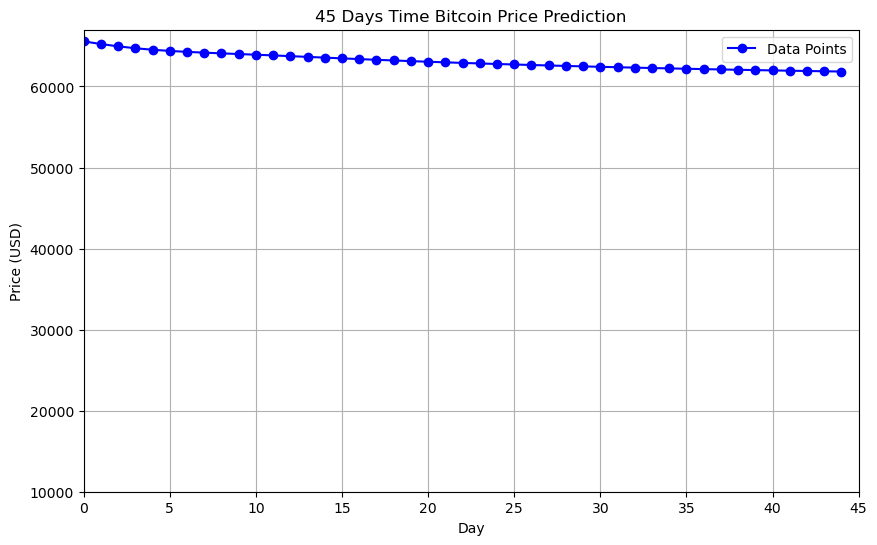

In [23]:


# Predicted bitcoin price
data = np.array(F)


x_values = np.arange(len(data))

# Plot the data
plt.figure(figsize=(10, 6))  
plt.plot(x_values, data, marker='o', linestyle='-', color='b', label='Data Points')
plt.xlabel('Day')
plt.ylabel('Price (USD)')
plt.ylim(10000, 67000)
plt.xlim(0, 45)
plt.title('45 Days Time Bitcoin Price Prediction')
plt.grid(True)
plt.legend()
plt.show()
